# After class summary ... 
----
Hope this somehow helps with revision .... 



# Bagging vs Boosting
There were some confusion regarding the similarities and differences. 
## Similarities: 
Both falls under **ensemble method**. Meaning, both consist of 
   * a set number of **base learners** (which are generally presumed to be weak, i.e. low performance), $f_1, f_2, \dots, f_K$. 
   * The base learners are themselves trained using some or all of the dataset. 
   * The trained base learners are combined in some way (usually straight majority vote or weight sum) to get the actual classifer. 

## Differences

|             | Bagging | Boosting     |
| :---        |    :----:   |          :---: |
| Training | Can be done in parallel since each base learner is trained independently | Have to be sequential since each new base learner is trying to fix mistakes made by combination of previous base learners. |
| Sampling      |  Can be done in parallel by doing sampling with replacement from the original data set    | Depends on previous generation and focus on samples previous generatation find "difficult".  |
| Voting   | Simple majority vote        | Weighted sum      |
| Effect on resulting classifier | Reduces variance (due to independent sampling) | Reduces bias (due to reclassifying wrongly classified difficult samples) |


## Adaboost vs XGBoost
Similarities: 
 * Both are boosting algorithms. 
 * Both can be done using arbitrary base learners. But they are frequently discussed / applied in the context where the base learners are decision trees. 
 * Both aim to train a final classifier which is a sum of base classifiers $F(x) = \sum_t f_t(x) = f_1(x) + f_2(x) + \dots + f_T(x)$. (let's forget about the weights for now, later we can always do $f_t(x) = w_tf_t(x)$). 
 * Both are trained iteratively with a new $f_t$ being trained based on what the **combination** of previous (already trained) learners, $F_{t-1} = f_1 + f_2 + \dots + f_{t -1}$, thinks is difficult. 
 * Both aim to minimise a training loss $L(F)$ (like most machine learning algorithms). And lets only focus on square loss $L(f) = \sum_i (F(x_i) - y_i)^2$ and forget the regularisation term for a moment. 


Differences: 

|      | Adaboost | XGBoost |
| :--- | :---: | :---: |
| Training data in each iteration | A **new** training set is sampled (with replacement) every iteration with a **changing** distribution $D_t$ that makes training samples incorrectly classified by previous iteration more likely to be sampled | Just use the whole dataset in every iteration | 
| Objective function in each iteration | Does not change. But do note that the objective function is taking average of a changing dataset every iteration | Changes every iteration since it includes the size of error made on each training sample in previous iteration. |


**Details for Adaboost**
TODO....

**Details for XGBoost**
TODO.... 



----

# Some common themes in machine learning
One goal of this section is to help you navigate the **terminology** you might encounter is machine learning. People give names to things because the name refer to something important but also common enough pattern that we don't need to come up with lots of names. Below we will see one illustrative common pattern. This is not the full scope of modern machine learning but it is illustrative of lots of common elements. 

## The task of learning
There is usually a hidden function that we are trying to learn. 

$$
y = f(x) 
$$

and we try our best to come out with $\hat{f}$ that does that. 

We might be doing regression, in which case, we want to answer: given predictor $x$, what could the response $y = f(x)$ be? 

Or we could be doing classification where we want $\hat{f}(x)$ to output the correct class of the observation $x$. 

Or we could be trying to approximate the probability of `class = some class label` given observation $x$. 



Common element of machine learning: 
## Data 
We don't have access to the truth $f$, but we do have access to a list of data $D_N = \{(x_1, y_1), \dots, (x_N, y_N)\}$ and we hope that the data is **representative** of the function, meaning it is not concentrated on one small region of $x$ for example. 

We have lots of names for $x$ - predictors, features, input, measurements...  
And lots of names for $y$ - response, labels, output, value... 

$x$ can be a vector, $x = (x_j)_j = (x_1, x_2, \dots, x_m)$, which means sometimes you might see actual numbers being labeled by two indices: 

$$
x_i = (x_{ij})_j = (x_{i1}, x_{i2}, \dots, x{im})
$$
where $x_{ij} =$ value of feature $j$ for data $i$. 
For example: 
 * $y=$ whether or not it rains and $x$ is cloudiness. So we have one continuous features and one binary output. 
 * $y=$ whether or not it rains and $x$ is cloudiness and whether it rained yesterday. We have one binary output, one continuous feature and one binary feature. 
 * $y=$ probability of rain and $x$ is temperature and cloudiness. We have a continuous output and two dimensional continuous inputs. 



Furthermore, we have **noise** in our data, meaning we only have 

$$y_i = f(x_i) + \epsilon_i$$ 

for each of the pair in $D_N$, not $y_i = f(x_i)$. This is one way statistics comes into learning. So not only do not know what $f$ is, we don't even know that the given $y_i$ in the dataset is exactly right. 


## Model
 This of this as family of possible guesses of $\hat{f}$. And they are usually **parametrised**, so we write $\hat{f}_\theta$. 

 The parameter $\theta$ determines one particular guess of the estimate $f$. Parameters itself can live in a huge space for example $\theta = (\theta_1, \dots, \theta_d)$. 

 Examples: 
  * Naive Bayes. The parameter space depends on the distribution you choose for the factors. For example, in Gaussian Naive Bayes, you still need to find the mean and variance for each $x_i$ and for each class $k$. 
  * Neural networks. The parameters are the network weights. 
  * Decision tree. Parameters are what to split on and where. This is a case where thinking about the set of estimator $\hat{f}$ itself (the tree) is actually easier than thinking about the parameters. 
  * Random Forest. Same parameters as decision trees but one set of parameter for each tree in the forest. 
  * ... 

Notice that in the above, there are still other choices to make: distributions for the factors in naive bayes; architecture / topology, depth, width for neural networks; maximum number of nodes or maximum depth for decision trees; total number of trees in random forest. 
These choices that are **made before training** are called **hyperparameters**.



## Objective / Score / Loss / Error function
Not every guess in the family of $\{\hat{f}\}$ will be good and we need a way to measure how good a guess $\hat{f}$ is. For example, 
 * Square loss: $L(\hat{f})(x) = (f(x) - \hat{f}(x))^2$. 
 * Absolute error: $L(\hat{f})(x) = |f(x) - \hat{f}(x)|$. 
 * Cross-entropy
 * log-loss
(some of the above can only applied for specific kinds of $f$, e.g. log-loss is when we are trying to predict probability). Wait, but we just say that we don't  have access to $f$! So we can't actually evaluate any of the above. But we do have access to data where $f(x_i)$ is **approximately** $y_i$. So we replace that with 

$$L(\hat{f})(x_i) = (y_i - \hat{f}(x))^2$$

But we have lots of data points $\{(x_i, y_i)\}$, well, just sum them up!

$$L(\hat{f}) = \sum_i  (y_i - \hat{f}(x))^2$$

and we have arrived at the **training error** for a particular guess $\hat{f}$. 

But our guesses $\hat{f}$ are actually parametrised by $\theta$, so we can actually express training loss as a function of $\theta$, 

$$
L(\hat{f}_\theta) = L(\theta) = \sum_i (y_i - \hat{f}_\theta(x))^2
$$


## Training / fitting
With what we have set up above, training a model translate to 
> Find the best parameter $\theta$ that minimises **training** loss $L(\theta)$. 

This becomes purely a problem in **optimisation**. 

## Testing and generalisation error
Once a good parameter and therefore a good $\hat{f}$ is found, we can ask 
> "Ok, so I know that $\theta$ do well in my dataset, but how do I know that it will do well in the real world?"

Ideally we can just compare $\hat{f}_\theta$ against the truth $f$ and account for all possible value of $x$ (by taking expectation for example)
$$
L(\hat{f}) = \sum_{\text{all possible values of $x$}} (\hat{f}_\theta(x) - f(x))^2 dx
$$
(I have ignored the fact that this should be an integral and you might want to weight against distribution of $x$ to make things converge). This is the **generalisation** score / loss / error. 

However, again, this whole exercise only occur because we don't know $f$!! What we can do is 
 * Go and collect more data and try $\hat{f}_\theta$ on them and recalculate the loss. 
 * Don't use all the data in $D_N$ for training, reserve some to simulate "collecting more data later on". (train-test split)
 * Do the previous train-test split, except we do that multiple times and then average the resulting scores. (cross validations)
The hope is that the performance measure generated with these methods will be a good predictor for the actual performance "in real life". 

----
# Demo implementation of how to do sampling with replacement using different probability density
---

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


def sample_one(probabilities):
    """
    Generate a single sample with probability density specified by
      `probabilities = [p1, p2, ..., pN]`
    We will return an index `i` between 0 and N-1 inclusive.
    """
    assert np.sum(probabilities) # just checking this is an honest probability density
    
    N = len(probabilities) # size of the sample space
    cummulative_density = np.cumsum(probabilities) # compute CDF
    cummulative_density = np.concatenate([[0], cummulative_density]) # prepend 0 to the list
    random_seed = np.random.rand() # generate a single random number between 0 and 1 uniformly.
    
    # Look for the index i such that CDF[i -1] <= random_seed <= CDF[i]
    for i in range(N):
        if cummulative_density[i] < random_seed <= cummulative_density[i + 1]:
            return i # break and return when found
    #return N -1 # if loop complete it must have fall on the last interval


def sample(n, items, probabilities):
    """For pedagogy only. Inefficient implementation"""
    samples = []
    for _ in range(n):
        index = sample_one(probabilities)
        samples.append(items[index])
    return samples

Empirical probabilities:
Probability of oberving a = 0.1328
Probability of oberving b = 0.1285
Probability of oberving c = 0.4971
Probability of oberving d = 0.2416


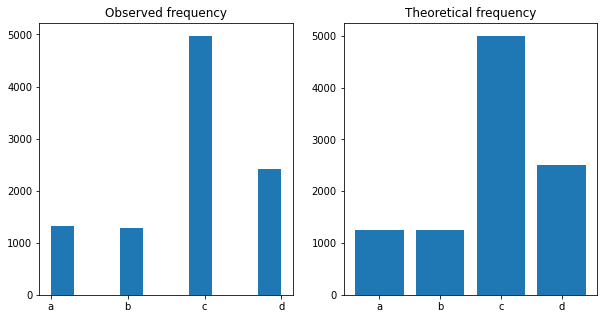

In [50]:
items = ['a', 'b', 'c', 'd']

probabilities = [1/8, 1/8, 4/8, 2/8]
num_samples = 10000
samples = sample(num_samples, items, probabilities)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(sorted(samples))
ax[0].set_title("Observed frequency")
ax[1].bar(x=items, height=np.array(probabilities) * num_samples)
ax[1].set_title("Theoretical frequency")

print(f"Empirical probabilities:")
a, b = np.unique(samples,  return_counts=True)
for a, b in zip(*np.unique(samples,  return_counts=True)):
    print(f"Probability of oberving {a} = {b / num_samples}")